# Data Analysis: GDP Growth in 65 different Countries

## Question 1: 
On the website https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/Stock-Watson
EmpiricalExercises-DataSets.htm, find the data file Growth, which contains data on average 
growth rates from 1960 through 1995 for 65 countries, along with variables that are potentially 
related to growth. A detailed description is given in Growth_Description on the website. 

In [3]:
# Toolkit
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind as ttes
import statistics as st

#### A. Construct a scatterplot of average annual growth rate (Growth) on the average trade share (TradeShare), that is, put TradeShare on the horizontal axis. Does there appear to be a relationship between the variables?

In [5]:
# Import Data Set Growth.xlsx using Pandas
Growth = pd.read_excel("C:\\Users\\Nick\\Desktop\\Econometrics\\Homework 4-2\\Growth.xlsx")

C:\Users\Nick\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<Axes: xlabel='tradeshare', ylabel='growth'>

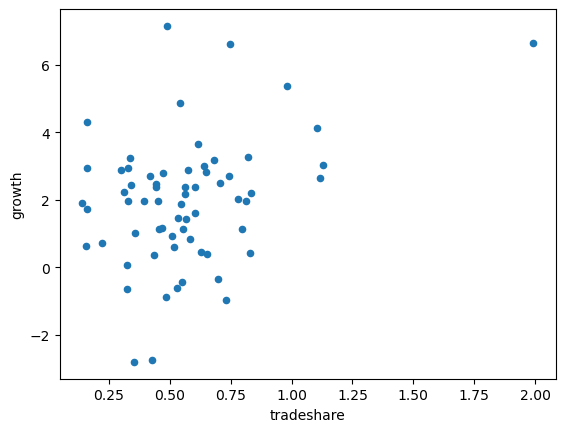

In [83]:
# Create a scatterplot with Growth on the Y-axis (Vertical Axis) and Trade-Shares on the X-axis (Horizontal Axis)
Growth.plot( kind = 'scatter', x = 'tradeshare', y = 'growth')

#### Findings: 
Visually there seems to be a weak postive correlation between tradeshare and the growth in GDP 

#### B. Using all observations, run a regression of Growth on TradeShare. What is the estimated slope? Is the estimated slope statistically significant? That is, can you reject the null hypothesis H0: β1 = 0 vs. a two-sided alternative hypothesis at the 10%, 5%, and 1% significance level? What is the estimated intercept? Use the regression to predict the growth rate for a country with a trade share of 0.5 and with a trade share of 1.0.

In [20]:
# Run regression of Growth on Tradeshare 
lm = smf.ols("growth ~ tradeshare", data = Growth).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     8.892
Date:                Tue, 05 Nov 2024   Prob (F-statistic):            0.00407
Time:                        11:07:43   Log-Likelihood:                -129.06
No. Observations:                  65   AIC:                             262.1
Df Residuals:                      63   BIC:                             266.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6403      0.490      1.307      0.1

In [88]:
# Despite the OLS regression telling us the information we can use params function to view the intercept and slope. 
lm.params

Intercept     0.640265
tradeshare    2.306434
dtype: float64

In [26]:
# Use the regression to predict the growth rate for a country with a trade share of 0.5 and with a trade share of 1.0
a = 0.640265 +(  2.306434 * 0.5 )
print('Growth Rate (TS = 0.5):', a)
# Trade share of 1.0
b = 0.640265 +(  2.306434 * 1 )
print('Growth Rate (TS = 1.0):', b)

Growth Rate (TS = 0.5): 1.793482
Growth Rate (TS = 1.0): 2.9466989999999997


#### Findings: 

The estimated slope seems to be about 2.31, This Slope is statistically signficant because the p-value of 0.004 for a two-sided test < a signifcance level of 0.01, and we reject the null hypothesis that Beta = 0 which suggests the alternative hypothesis that Beta is not 0. This also holds true under a significance level of 0.05 (5%) and 0.10 (10%). 

The Estimated Intercept is 0.64. Based on the regression the predicted growth rates of a trade share of 0.5 is 1.79 and the predicted growth rate for 1.0 os 2.95.

#### C. One country, Malta, has a trade share much larger than the other countries. Find Malta on your scatterplot. Estimate the same regression, excluding the data from Malta. Answer the same question in (b).

In [93]:
# Find Malta
Growth.iloc[64]

country_name        Malta
growth           6.652838
oil                     0
rgdp60             1374.0
tradeshare       1.992616
yearsschool          5.64
rev_coups             0.0
assasinations         0.0
Name: 64, dtype: object

In [30]:
# creating new data frame without outlier Malta
Growth_new = Growth.drop([64])

In [95]:
# Run an OLS regression on the new data frame
lm_2 = smf.ols( "growth ~ tradeshare", data = Growth_new).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.898
Date:                Tue, 05 Nov 2024   Prob (F-statistic):             0.0937
Time:                        11:53:39   Log-Likelihood:                -127.04
No. Observations:                  64   AIC:                             258.1
Df Residuals:                      62   BIC:                             262.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9574      0.580      1.650      0.1

#### Use the new regression to predict the growth rate for a country with a trade share of 0.5 and with a trade share of 1.0

In [106]:
# Trade share of 0.5 and 1.0
x5 = pd.DataFrame({'tradeshare' : [0.5]})
print("Growth Rate (TS = 0.5):",lm_2.predict(x5))
x10 = pd.DataFrame({'tradeshare' : [1.0]})
print("Growth Rate (TS = 1.0):",lm_2.predict(x10))

Growth Rate (TS = 1.0): 0    1.797863
dtype: float64
Growth Rate (TS = 1.0): 0    2.638315
dtype: float64


#### Results: 
The estimated slope for the regression line that excludes Malta from the data is 1.6809 and the estimated y-intercept is  0.9574. Throught the OLS Regression Result it can be observed that the p-vaue for the slope is 0.094 meaning under a two tailed test with a significance level of 1% and 5% the slope is not statistically significant and this indicates strong evidence for the null hypothesis that the slope is equal to 0. However for a signifance of 10% the p-value is less than the significance level therefore we reject the null hypothesis at this level. 

The y-intercept of 0.9574. Using the new regression line it can also be observed that the predicted value of Growth for a Trades share value of 0.5 is about 1.80 and for a trade share value of 1.0 is about 2.64.

#### D. Plot the estimated regression functions from (c) and (b).

In [115]:
# Create data frame for Regression lines with Malta and without Malta
xnew = pd.DataFrame({'tradeshare': [Growth.tradeshare.min(),Growth.tradeshare.max()]})
pred =lm.predict(xnew)
pred_2 = lm_2.predict(xnew)

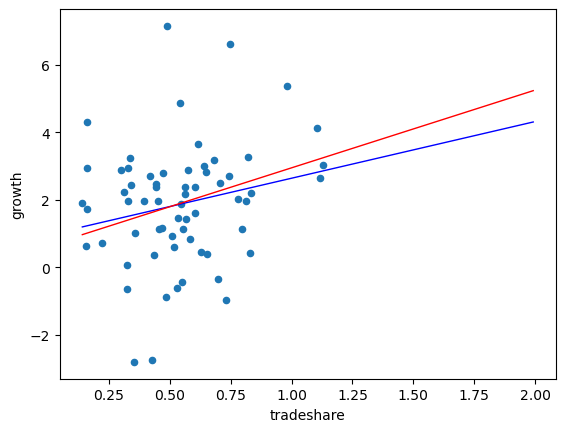

In [119]:
# Graph the new data frame excluding Malta, with a red regression representing the old regression that includes Malta and a new regression in blue which excludes Malta
Growth_new.plot(kind = 'scatter', x = 'tradeshare', y= 'growth')
plt.plot(xnew, pred_2, c = 'blue', linewidth = 1)
plt.plot(xnew, pred, c = 'red', linewidth = 1)

In [123]:
Growth.iloc[64]

country_name        Malta
growth           6.652838
oil                     0
rgdp60             1374.0
tradeshare       1.992616
yearsschool          5.64
rev_coups             0.0
assasinations         0.0
Name: 64, dtype: object

## Conclusion: Malta
Malta is located at the point (1.992616,  6.652838). Due to Malta's larger proportion of GDP being contributed to trade than other countries, Malta's Tradeshare value is larger than others. In other words the sum of Malta imports and Exports is a higher percentage of their GDP growth. Through further research these finding can be further attributed to Malta's involvement in international trade with other countries such as EU and US. It should also be noted that according to International Trade Adinistration Malta imports much of its gas and fuel from the United States. Additional in the growth data Malta's variable "oil" which is 1 if oil accounted for at least half of exports in 1960 or 0 otherwise is noted as 0 for Malta. Therefore further research into Malta's domestric resource avaliablity could indicate a need for more trade to provide resources such as fuel and oil. 

Due to this reason Malta become's an outlier. Therefore, representing Malta within the data will unproportionately misrepresent a relationship between trade shares and growth as the effect of trade share for a country like Malta is different than a majority of other countries who might be less reliant on trade. So if the goal is to predict the effectiveness of a policy on the GDP growth for a majority of countries then we should exclude Malta as the predicted growth would be greater that the actual change, however if we are to analysize the effect that increasing trade has on a nation that relies on trade then Malta could provide valuable insights that economist can learn from. 

<Figure size 800x600 with 0 Axes>

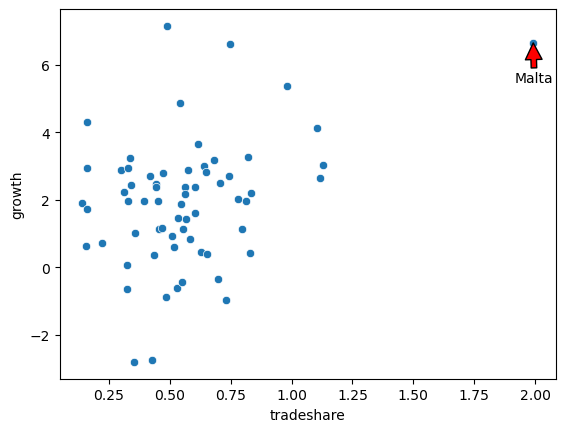

In [21]:
plt.figure(figsize =(8,6))
fig, ax = plt.subplots()
sns.scatterplot(ax = ax, x =Growth['tradeshare'], y = Growth['growth'])
ax.annotate('Malta', xy = (1.992616, 6.652838), xytext = (1.916616,5.502838), arrowprops = dict(facecolor = 'red'));


## Question 2:
On the website https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/Stock-Watson
EmpiricalExercises-DataSets.htm, find the data file Earnings_and_Height, which contains data 
on earnings, height, and other characteristics of a random sample of U.S. workers. Read carefully 
the detailed description, Earnings_and_Height_Description, on the website.  

In [127]:
EarnH = pd.read_stata("C:\\Users\\Nick\\Desktop\\Econometrics\\Homework 4-2\\Earnings_and_Height.dta")

#### A. What is the median value of height in the sample? (Answer: 67)

In [146]:
# finding the Median Value.
print( "Median Value of Height:", st.median(EarnH['height']) )

Median Value of Height: 67.0


#### B. Estimate average earnings of workers whose height is at most the median value. Estimate average earnings of workers whose height is greater than the median value.

In [141]:
BelowMean = EarnH.loc[EarnH['height'] <= 67]
print("Average for Below/Equal Median:", st.mean(BelowMean['earnings']))
AboveMean = EarnH.loc[EarnH['height'] > 67]
print("Average for Above Median: ", st.mean(AboveMean['earnings']))
# Average Earnings for Workers whos height is equal to or below the mean is $44,488.44

Average for Below/Equal Median: 44488.43593526957
Average for Above Median:  49987.87583705357


#### C. Conduct a hypothesis test to answer the following questions: On average, do taller workers earn more than shorter workers? How much more? What is a 95% confidence interval for the difference in average earnings (i.e., two-sided CI)?

In [176]:
EH = smf.ols( "earnings ~ height", data = EarnH).fit()
print(EH.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.13e-44
Time:                        12:54:20   Log-Likelihood:            -2.0755e+05
No. Observations:               17870   AIC:                         4.151e+05
Df Residuals:                   17868   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -512.7336   3386.856     -0.151      0.8

In [157]:
EarnH.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0:female,48,"1:Married, sps in hh",13,1:Private company,3:South,non-hispanic white,84054.750000,65.0,133.0,1.0
1,0:female,41,6:Never Married,12,1:Private company,2:Midwest,non-hispanic white,14021.394531,65.0,155.0,1.0
2,0:female,26,"1:Married, sps in hh",16,1:Private company,1:Northeast,non-hispanic white,84054.750000,60.0,108.0,1.0
3,0:female,37,"1:Married, sps in hh",16,1:Private company,2:Midwest,non-hispanic white,84054.750000,67.0,150.0,1.0
4,0:female,35,6:Never Married,16,1:Private company,1:Northeast,non-hispanic white,28560.386719,68.0,180.0,1.0


In [56]:
t_test,p_value = ttes(EarnH['height'], EarnH['earnings'])
p_value

0.0

##### Findings:
On Average our sample data shows that taller workers data earns about $5,499.44 more than shorter persons data, Through conducting a hypothesis test it can be seen that the p-value associated with the slope for height is very small below significant levels of 10%, 5%, and 1% therefore can reject the null hypothesis that there is no correlation between the two. 

#### D. Construct a scatterplot of annual earnings (Earnings) on height (Height), that is, place height on the horizontal axis. Explain why the points on the plot fall along horizontal lines. 

<Axes: xlabel='height', ylabel='earnings'>

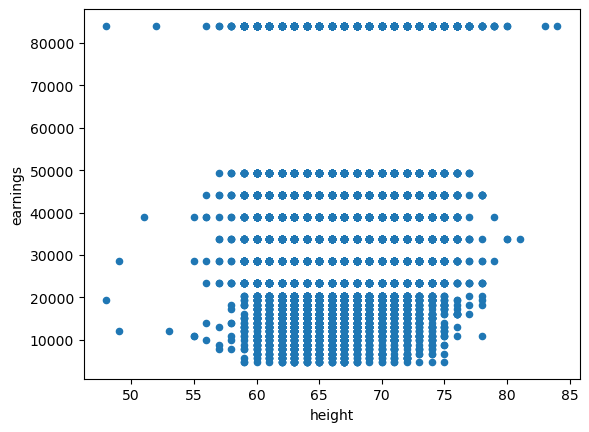

In [58]:
EarnH.plot(kind = 'scatter', x = 'height', y = 'earnings')

Earnings fall along horizontal lines because earnings are recorded in the data as an average of an income bracket. For example 26,000 - 30,000 would be considered a bracket and represented as \$28,000.

#### E. Run a regression of Earnings on Height. What is the estimated slope? Is the estimated slope statistically significant? What is the estimated intercept? What is the R2? What is the standard error of the regression?  

In [60]:
EH = smf.ols( "earnings ~ height", data = EarnH).fit()
print(EH.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.13e-44
Time:                        11:08:56   Log-Likelihood:            -2.0755e+05
No. Observations:               17870   AIC:                         4.151e+05
Df Residuals:                   17868   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -512.7336   3386.856     -0.151      0.8

The estimated slope is 707.67. This slope is however not statistically significant. The intercept is -512.73. R2 is 0.011. The standard error of regression in 50.489.

#### F. Use the estimated regression in (e) to predict earnings for a worker who is 67 inches tall, for a 
worker who is 70 inches tall, and for a worke  who is 65 inches tall. 

In [62]:
H67 = pd.DataFrame({'height': [67]})
print("Earnings [67 inches]: ", EH.predict(H67))
H70 = pd.DataFrame({'height': [70]})
print("Earnings [70 inches]:", EH.predict(H70))
H65 = pd.DataFrame({'height': [65]})
print("Earnings [70 inches:", EH.predict(H65))

Earnings [67 inches]:  0    46901.260823
dtype: float64
Earnings [70 inches]: 0    49024.275499
dtype: float64
Earnings [70 inches: 0    45485.917706
dtype: float64


#### G. Suppose height were measured in centimeters instead of inches. Answer the following 
questions about the Earnings on Height (in cm) regression: What is the estimated slope of the
regression? Is the estimated slope statistically significant? What is the estimated intercept 
What is the R2? What is  he standard error of the regression?  

The slope will remain the same, however the slope is still statistically insignificant. The estimated intercept would now be -1302.33. R-squared would remain the same at 0.011 and standard error of the regression at 50.489.